<a href="https://colab.research.google.com/github/robertozerbini/blog/blob/add-license-1/Roberto_Zerbini's_Blog_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math 
import sklearn 

#Get Data

In [2]:
 from sklearn.datasets import make_moons

 X, y = make_moons(n_samples=500, shuffle=True, noise=.4, random_state=123)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

degree = 6
pl = PolynomialFeatures(degree = degree, include_bias= False)

X = pl.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

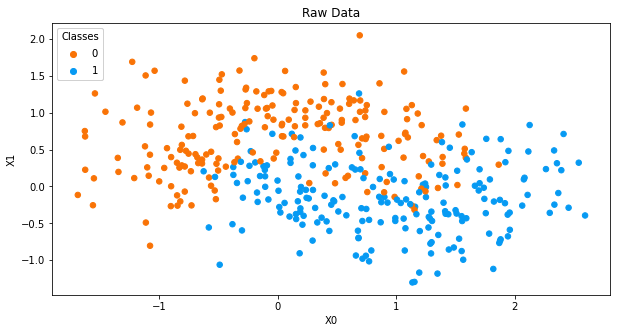

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
cmap = mpl.colors.ListedColormap(['#f97306', '#069af3'])
plt.title('Raw Data')
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap = cmap, label=np.unique(y_train), s=30)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)
#ax.axis(axes)
ax.set_xlabel("X0")
ax.set_ylabel("X1")

plt.show()

#Train Model

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'none', max_iter = 10000)

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
from sklearn.metrics import roc_curve,auc 

pred_train = model.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_train, pos_label=1)
auc_train = auc(fpr, tpr)

pred_test = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_test, pos_label=1)
auc_test = auc(fpr, tpr)

print('Train AUC: {:.2} Test AUC: {:.2}'.format(auc_train, auc_test))

Train AUC: 0.89 Test AUC: 0.81


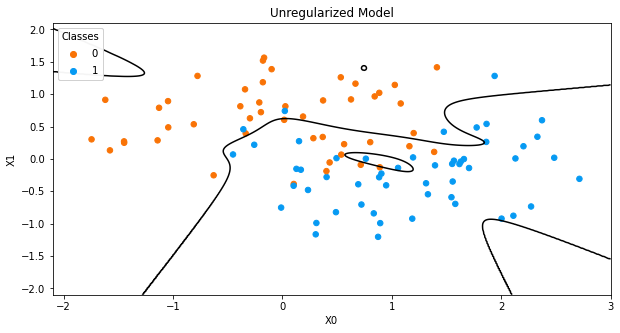

In [24]:
X_line = np.linspace(3,-3,100)

#set contours
x0, x1 = np.meshgrid(
        np.linspace(-2.1, 3, 500).reshape(-1, 1),
        np.linspace(-2.1, 2.1, 500).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(pl.fit_transform(X_new))

p1 = y_proba[:, 1].reshape(x0.shape)

fig, ax = plt.subplots(figsize=(10,5))
plt.title('Unregularized Model')

contour = ax.contour(x0, x1, p1, levels = [.5], colors = 'black')

scatter = ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, cmap = cmap, label=np.unique(y_test), s=30)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")

ax.add_artist(legend1)
ax.set_xlabel("X0")
ax.set_ylabel("X1")

plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty = 'l2', max_iter = 10000, solver = 'liblinear')

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
pred_train = model.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, pred_train, pos_label=1)
auc_train = auc(fpr, tpr)

pred_test = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_test, pos_label=1)
auc_test = auc(fpr, tpr)

print('Train AUC: {:.2} Test AUC: {:.2}'.format(auc_train, auc_test))

Train AUC: 0.89 Test AUC: 0.85


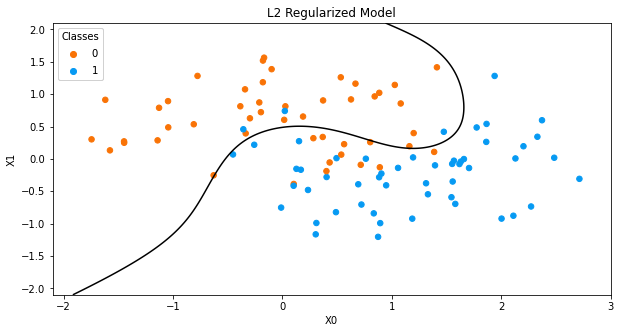

In [19]:
X_line = np.linspace(3,-3,100)

#set contours
x0, x1 = np.meshgrid(
        np.linspace(-2.1, 3, 500).reshape(-1, 1),
        np.linspace(-2.1, 2.1, 500).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = model.predict_proba(pl.fit_transform(X_new))

p1 = y_proba[:, 1].reshape(x0.shape)

fig, ax = plt.subplots(figsize=(10,5))
plt.title('L2 Regularized Model')

contour = ax.contour(x0, x1, p1, levels = [.5], colors = 'black')

scatter = ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, cmap = cmap, label=np.unique(y_test), s=30)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")

ax.add_artist(legend1)
ax.set_xlabel("X0")
ax.set_ylabel("X1")

plt.show()